In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


In [3]:
df = pd.read_csv("fff.csv")
df = df.drop(columns="Unnamed: 0")

In [4]:
df

,station_id,teplota vzduchu,vlhkost vzduchu,teplota rosneho bodu,rychlost vetra,smer vetra,teplota vozovky,grip,water,snow,...,timestamp,warning,surface_state,surface_state_error,surface_state_dry,surface_state_moist,surface_state_wet,surface_state_frosty,surface_state_snowy,surface_state_icy
0,50,8.9,68.4,3.4,3.2,149.0,10.1,0.82,0.0,0.00,...,1619993400000000000,0,1,0,1,0,0,0,0,0
1,54,8.1,66.1,2.2,3.6,307.0,10.8,0.82,0.0,0.00,...,1619993700000000000,0,1,0,1,0,0,0,0,0
2,53,6.3,62.3,-0.3,1.4,240.0,9.8,0.82,0.0,0.00,...,1619994300000000000,0,1,0,1,0,0,0,0,0
3,54,8.0,66.6,2.2,2.7,319.0,10.9,0.82,0.0,0.00,...,1619994600000000000,0,1,0,1,0,0,0,0,0
4,50,8.6,66.6,2.7,4.2,152.0,10.2,0.82,0.0,0.00,...,1619994900000000000,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91388,54,-2.4,65.0,-8.0,2.1,356.0,-2.4,0.82,0.0,0.00,...,1646091300000000000,0,1,0,1,0,0,0,0,0
91389,50,-2.3,64.7,-8.0,1.3,318.0,-1.9,0.65,0.0,0.01,...,1646091600000000000,0,1,0,1,0,0,0,0,0
91390,50,-2.4,64.7,-8.1,1.4,328.0,-1.9,0.68,0.0,0.01,...,1646091900000000000,0,1,0,1,0,0,0,0,0
91391,54,-2.3,65.7,-7.9,2.8,20.0,-2.6,0.82,0.0,0.00,...,1646092200000000000,0,1,0,1,0,0,0,0,0


In [25]:
# Import the model we are using
X = df[['teplota vzduchu','vlhkost vzduchu','teplota rosneho bodu','teplota vozovky']].values
Y = df['surface_state'].values


from sklearn.ensemble import RandomForestClassifier# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)#
rf.fit(X, Y)
estimator = rf.estimators_[2]

# Use the forest's predict method on the test data
predictions = rf.predict(X)# Calculate the absolute errors
errors = abs(predictions - Y)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')




Mean Absolute Error: 0.05 degrees.


In [26]:
from sklearn.tree import export_graphviz
export_graphviz(estimator,
                out_file='tree.dot',
                # feature_names = iris.feature_names,
                # class_names = iris.target_names,
                # rounded = True, proportion = False,
                precision = 2, filled = True)

In [27]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.00388684 to fit


0

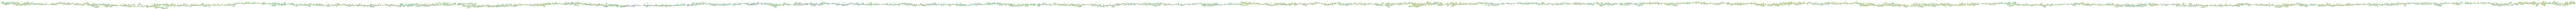

In [28]:
from IPython.display import Image
Image(filename = 'tree.png')
